http://people.revoledu.com/kardi/tutorial/Regression/OLS.html

http://setosa.io/ev/ordinary-least-squares-regression/

In [1]:
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 16

In [3]:
vehiculos = pd.read_csv("data/vehiculos_procesado.csv", 
                 usecols=["consumo", "co2", "cilindros","desplazamiento"])


litros_por_galon =  3.78541
vehiculos["consumo_litros_milla"] = litros_por_galon/ vehiculos.consumo



In [267]:
vehiculos.shape

(35539, 5)

In [269]:
vehiculos.head()

desplazamiento  cilindros  consumo         co2  consumo_litros_milla
0             2.5        4.0       17  522.764706              0.222671
1             4.2        6.0       13  683.615385              0.291185
2             2.5        4.0       16  555.437500              0.236588
3             4.2        6.0       13  683.615385              0.291185
4             3.8        6.0       16  555.437500              0.236588

In [6]:
pct_entrenamiento = 0.8
vehiculos_training = vehiculos.sample(frac=pct_entrenamiento)


vehiculos_test = vehiculos[~vehiculos.index.isin(vehiculos_training.index)]

print(vehiculos_training.shape)
print(vehiculos_test.shape)

(28431, 5)
(7108, 5)


In [15]:
import statsmodels.formula.api as smf
import numpy as np

modelo = smf.ols('co2 ~ consumo_litros_milla + cilindros + desplazamiento', 
                  data=vehiculos_training).fit()

In [16]:
model_params = modelo.params.to_dict()
model_params

{'Intercept': 10.253078658407485,
 'cilindros': -1.6631151566183748,
 'consumo_litros_milla': 2254.4857192232475,
 'desplazamiento': 5.7360135280710898}

In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 7.931e+05
Date:                Mon, 28 Aug 2017   Prob (F-statistic):               0.00
Time:                        01:19:39   Log-Likelihood:            -1.0945e+05
No. Observations:               28431   AIC:                         2.189e+05
Df Residuals:                   28427   BIC:                         2.189e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.2531      0.358     28.616      0.000       9.551      10.955
consumo_litros_milla  2254.4857      2.476    910.412      0.000    2249.632    2259.339
cilindros               -1.6631      0.094    -17.783      0.000      -1.846      -1.480
desplazamiento           5.7360      0.130     44.006      0.000       5.481       5.991
==============================================================================
Omnibus:                    11821.494   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4635360.934
Skew:                          -0.685   Prob(JB):                         0.00
Kurtosis:                      65.538   Cond. No.                         259.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model_formula = "y ~ {Intercept:.3f} + {cilindros:.2f}*cilindros + {consumo_litros_milla:.2f}*consumo_litros_milla + {desplazamiento:.3f}*desplazamiento".format(
    **model_params)
model_formula

'y ~ 10.253 + -1.66*cilindros + 2254.49*consumo_litros_milla + 5.736*desplazamiento'

/home/manuel/anaconda3/envs/data/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


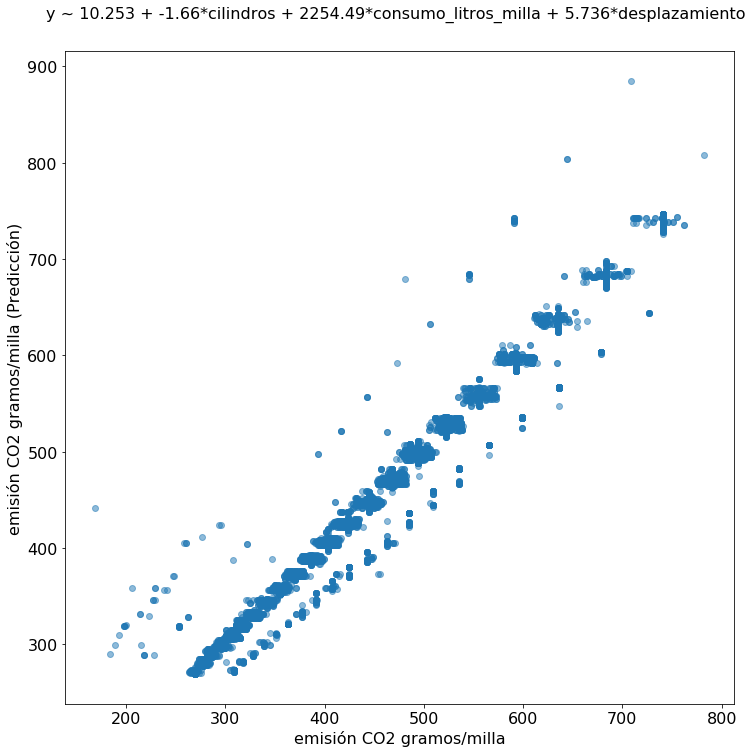

In [26]:
plt.scatter(vehiculos.co2, modelo.predict(vehiculos), alpha=0.5)
plt.text(120, 950, model_formula)
plt.xlabel("emisión CO2 gramos/milla")
plt.ylabel("emisión CO2 gramos/milla (Predicción)")
plt.legend();

In [19]:
def error_cuadrático_medio(y, y_pred):
    return np.sum((y-y_pred)**2)/len(y)

In [335]:
error_test = error_cuadrático_medio(df_test.co2, df_test.co2_pred)
error_test

188.77702635364938

In [4]:
from sklearn.linear_model import LinearRegression

In [11]:
variables_independientes = ['desplazamiento', 'cilindros','consumo_litros_milla']
variable_dependiente = 'co2'

X_training = vehiculos_training[variables_independientes]
y_training = vehiculos_training[variable_dependiente]
X_test = vehiculos_test[variables_independientes]
y_test = vehiculos_test[variable_dependiente]

In [8]:
modelo = LinearRegression()

In [10]:
modelo_entrenado = modelo.fit(X, y)

In [12]:
y_pred = modelo_entrenado.predict(X_test)